# Analysis Development Notebook

Python is a great tool for analysing data and what makes it even better is the fact that analysts, developers, scientists, etc., have contributed their code in the form of packages so that we don't have to build things from scratch every single time we analyse data.

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt
pd.set_option('display.max_columns', None)

%matplotlib inline

## 1. Collecting Data

A common way to load your data as is as `df`, which stads for __dataframe__. You can think of a dataframe as a spreadsheet document such as Microsoft Excel or Google Sheets.

The python package called pandas has many useful tools to help us manipulate spreadsheet-like objects (a.k.a. dataframes).

In [226]:
df = pd.read_csv("./data/ramon_garmin.csv")

We always want to make sure the dataset was loaded into memory corrently and also see if we can spot some inconsistencies right off the bat. We can do that 

In [227]:
df.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
0,Treadmill Running,05-02-20 18:02,False,Treadmill Running,1.27,165,0:13:01,130,141,2.2,138,167,10:14,8:04,--,--,1.13,0,0,0,0,0,0:00,77.0,0:00,No,04:21.9,2,0
1,Treadmill Running,04-02-20 16:35,False,Treadmill Running,0.63,65,05:10.2,128,137,1.2,162,168,8:12,7:30,--,--,1.21,0,0,0,0,0,0:00,75.2,0:00,No,00:00.0,1,0
2,Treadmill Running,03-02-20 18:01,False,Treadmill Running,1.27,148,0:10:54,135,147,2.3,164,169,8:34,7:37,--,--,1.15,0,0,0,0,0,0:00,75.2,0:00,No,02:18.9,2,0
3,Running,01-02-20 14:37,False,Sydney Running,2.64,359,0:23:11,152,171,3.7,160,178,8:47,6:59,118,174,1.15,0,0,0,0,0,0:00,91.4,0:00,No,05:20.0,3,0
4,Running,23-01-20 6:36,False,Running,0.49,71,04:23.3,159,173,2.1,166,183,8:56,8:11,--,39,1.08,0,0,0,0,0,0:00,78.8,0:00,No,00:00.0,1,0


In [228]:
df.shape

(441, 29)

## 2. Preparing Data 4 Analysis

In [229]:
# Let's first have a look at our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 29 columns):
Activity Type               441 non-null object
Date                        441 non-null object
Favorite                    441 non-null bool
Title                       441 non-null object
Distance                    441 non-null float64
Calories                    441 non-null object
Time                        441 non-null object
Avg HR                      441 non-null int64
Max HR                      441 non-null int64
Aerobic TE                  441 non-null object
Avg Run Cadence             441 non-null object
Max Run Cadence             441 non-null object
Avg Pace                    441 non-null object
Best Pace                   441 non-null object
Elev Gain                   441 non-null object
Elev Loss                   441 non-null object
Avg Stride Length           441 non-null float64
Avg Vertical Ratio          441 non-null int64
Avg Vertical Oscillation    441 no

In [230]:
df.describe()

,Distance,Avg HR,Max HR,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Min Temp,Max Temp
count,441.000000,441.000000,441.000000,441.000000,441.0,441.0,441.0,441.0,441.0,441.000000,441.0
mean,1.510998,126.108844,146.303855,0.685034,0.0,0.0,0.0,0.0,0.0,78.314286,0.0
std,1.073580,22.566809,21.539250,0.571900,0.0,0.0,0.0,0.0,0.0,5.944516,0.0
min,0.000000,70.000000,82.000000,0.000000,0.0,0.0,0.0,0.0,0.0,55.400000,0.0
25%,0.820000,104.000000,128.000000,0.000000,0.0,0.0,0.0,0.0,0.0,75.200000,0.0
50%,1.020000,133.000000,151.000000,1.050000,0.0,0.0,0.0,0.0,0.0,77.000000,0.0
75%,2.020000,146.000000,163.000000,1.160000,0.0,0.0,0.0,0.0,0.0,82.400000,0.0
max,4.690000,164.000000,190.000000,2.030000,0.0,0.0,0.0,0.0,0.0,96.800000,0.0


In [231]:
df.replace('--', np.nan, inplace=True)

In [232]:
df.tail()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
436,Running,06-10-17 11:04,False,Kansas City Running,4.44,608,0:44:14,141,162,3.5,157,169,9:58,7:58,144,138,1.03,0,0,0,0,0,0:00,80.6,0:00,No,00:00.0,NaN,0
437,Strength Training,25-09-17 19:30,False,Strength,0.00,80,0:15:46,88,107,0.2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,0,0,0,0,0:00,73.4,0:00,No,00:00.0,NaN,0
438,Running,21-09-17 12:16,False,Kansas City Running,4.25,565,0:37:26,149,182,3.9,165,180,8:48,7:19,108,121,1.11,0,0,0,0,0,0:00,86.0,0:00,No,00:00.0,NaN,0
439,Running,19-09-17 18:45,False,Kansas City Running,4.32,553,0:36:57,148,170,4.2,165,177,8:33,7:16,98,141,1.14,0,0,0,0,0,0:00,82.4,0:00,No,00:00.0,NaN,0
440,Running,16-09-17 15:17,False,Kansas City Running,3.02,404,0:24:56,156,187,3.8,161,200,8:15,4:57,59,98,1.21,0,0,0,0,0,0:00,84.2,0:00,No,00:00.0,NaN,0


In [233]:
df['Number of Runs'].unique()

array(['2', '1', '3', '4', '5', nan], dtype=object)

In [234]:
df.drop(['Avg Vertical Ratio', 'Avg Vertical Oscillation',
         'Training Stress Score®', 'Grit', 'Flow', 'Favorite',
         'Bottom Time', 'Surface Interval', 'Best Lap Time', 
         'Max Temp', 'Decompression'], axis=1, inplace=True)

In [235]:
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Number of Runs
0,Treadmill Running,05-02-20 18:02,Treadmill Running,1.27,165,0:13:01,130,141,2.2,138,167,10:14,8:04,NaN,NaN,1.13,77.0,2
1,Treadmill Running,04-02-20 16:35,Treadmill Running,0.63,65,05:10.2,128,137,1.2,162,168,8:12,7:30,NaN,NaN,1.21,75.2,1
2,Treadmill Running,03-02-20 18:01,Treadmill Running,1.27,148,0:10:54,135,147,2.3,164,169,8:34,7:37,NaN,NaN,1.15,75.2,2
3,Running,01-02-20 14:37,Sydney Running,2.64,359,0:23:11,152,171,3.7,160,178,8:47,6:59,118,174,1.15,91.4,3
4,Running,23-01-20 6:36,Running,0.49,71,04:23.3,159,173,2.1,166,183,8:56,8:11,NaN,39,1.08,78.8,1


Fix the date

Make your numerical variables numerical.

In [236]:
type(df['Time'].iloc[1])

str

In [237]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dt.year.value_counts()

2018    224
2019    198
2017     12
2020      7
Name: Date, dtype: int64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 18 columns):
Activity Type        441 non-null object
Date                 441 non-null datetime64[ns]
Title                441 non-null object
Distance             441 non-null float64
Calories             440 non-null object
Time                 441 non-null object
Avg HR               441 non-null int64
Max HR               441 non-null int64
Aerobic TE           440 non-null object
Avg Run Cadence      274 non-null object
Max Run Cadence      274 non-null object
Avg Pace             426 non-null object
Best Pace            426 non-null object
Elev Gain            272 non-null object
Elev Loss            266 non-null object
Avg Stride Length    441 non-null float64
Min Temp             441 non-null float64
Number of Runs       436 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(12)
memory usage: 62.1+ KB


In [239]:
df['Calories'] = pd.to_numeric(df['Calories'])
df['Aerobic TE'] = pd.to_numeric(df['Aerobic TE'])
df['Avg Run Cadence'] = pd.to_numeric(df['Avg Run Cadence'])
df['Max Run Cadence'] = pd.to_numeric(df['Max Run Cadence'])
df['Number of Runs'] = pd.to_numeric(df['Number of Runs'])

In [240]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.week
df['weekday'] = df['Date'].dt.weekday
df['quarter'] = df['Date'].dt.quarter
df['time_exercise'] = df['Date'].dt.time
df['date_exercise'] = df['Date'].dt.date

In [241]:
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Number of Runs,month,year,week,weekday,quarter,time_exercise,date_exercise
0,Treadmill Running,2020-05-02 18:02:00,Treadmill Running,1.27,165.0,0:13:01,130,141,2.2,138.0,167.0,10:14,8:04,NaN,NaN,1.13,77.0,2.0,5,2020,18,5,2,18:02:00,2020-05-02
1,Treadmill Running,2020-04-02 16:35:00,Treadmill Running,0.63,65.0,05:10.2,128,137,1.2,162.0,168.0,8:12,7:30,NaN,NaN,1.21,75.2,1.0,4,2020,14,3,2,16:35:00,2020-04-02
2,Treadmill Running,2020-03-02 18:01:00,Treadmill Running,1.27,148.0,0:10:54,135,147,2.3,164.0,169.0,8:34,7:37,NaN,NaN,1.15,75.2,2.0,3,2020,10,0,1,18:01:00,2020-03-02
3,Running,2020-01-02 14:37:00,Sydney Running,2.64,359.0,0:23:11,152,171,3.7,160.0,178.0,8:47,6:59,118,174,1.15,91.4,3.0,1,2020,1,3,1,14:37:00,2020-01-02
4,Running,2020-01-23 06:36:00,Running,0.49,71.0,04:23.3,159,173,2.1,166.0,183.0,8:56,8:11,NaN,39,1.08,78.8,1.0,1,2020,4,3,1,06:36:00,2020-01-23


In [242]:
time_of_day = []

for i in df['time_exercise']:
    if i > datetime.time(5, 59, 59) and i < datetime.time(12, 0, 0):
        time_of_day.append('morning')
    elif i > datetime.time(11, 59, 59) and i < datetime.time(18, 0, 0):
        time_of_day.append('afternoon')
    else:
        time_of_day.append('night')

In [243]:
time_of_day[-5:]

['morning', 'night', 'afternoon', 'night', 'afternoon']

In [244]:
df['time_day'] = time_of_day

In [245]:
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Number of Runs,month,year,week,weekday,quarter,time_exercise,date_exercise,time_day
0,Treadmill Running,2020-05-02 18:02:00,Treadmill Running,1.27,165.0,0:13:01,130,141,2.2,138.0,167.0,10:14,8:04,NaN,NaN,1.13,77.0,2.0,5,2020,18,5,2,18:02:00,2020-05-02,night
1,Treadmill Running,2020-04-02 16:35:00,Treadmill Running,0.63,65.0,05:10.2,128,137,1.2,162.0,168.0,8:12,7:30,NaN,NaN,1.21,75.2,1.0,4,2020,14,3,2,16:35:00,2020-04-02,afternoon
2,Treadmill Running,2020-03-02 18:01:00,Treadmill Running,1.27,148.0,0:10:54,135,147,2.3,164.0,169.0,8:34,7:37,NaN,NaN,1.15,75.2,2.0,3,2020,10,0,1,18:01:00,2020-03-02,night
3,Running,2020-01-02 14:37:00,Sydney Running,2.64,359.0,0:23:11,152,171,3.7,160.0,178.0,8:47,6:59,118,174,1.15,91.4,3.0,1,2020,1,3,1,14:37:00,2020-01-02,afternoon
4,Running,2020-01-23 06:36:00,Running,0.49,71.0,04:23.3,159,173,2.1,166.0,183.0,8:56,8:11,NaN,39,1.08,78.8,1.0,1,2020,4,3,1,06:36:00,2020-01-23,morning


In [246]:
type(df['Number of Runs'].iloc[0])

numpy.float64

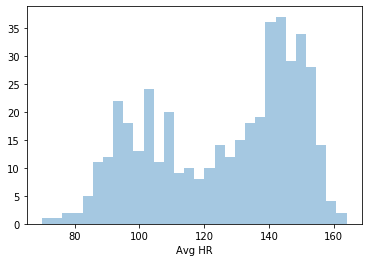

In [247]:
sns.distplot(df['Avg HR'], bins=30, kde=False)

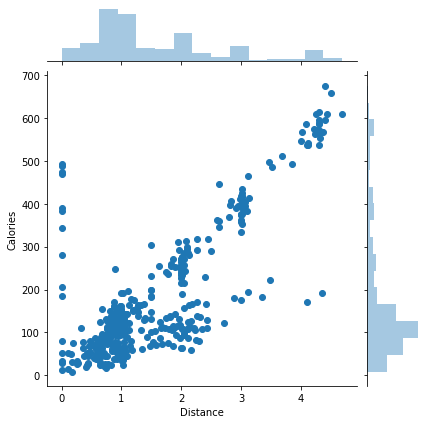

In [248]:
sns.jointplot(x='Distance', y='Calories', data=df)

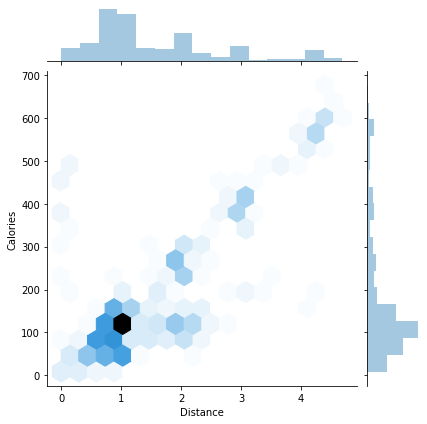

In [249]:
sns.jointplot(x='Distance', y='Calories', data=df, kind='hex')

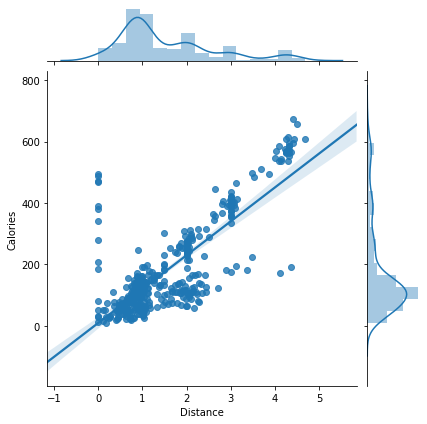

In [250]:
sns.jointplot(x='Distance', y='Calories', data=df, kind='reg')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


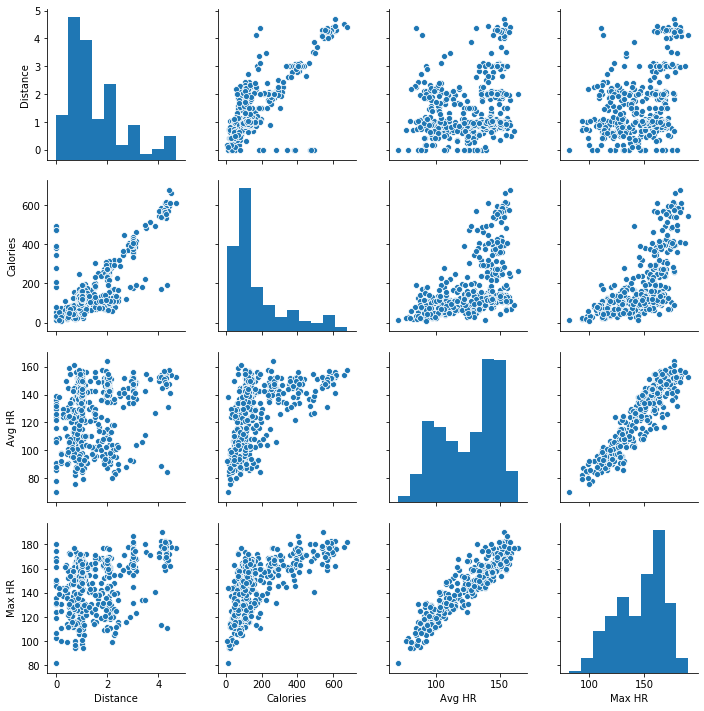

In [251]:
sns.pairplot(df[['Distance', 'Calories', 'Avg HR', 'Max HR']])

In [256]:
alt.Chart(df[['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title']]).mark_circle(size=60).encode(
    x='Distance',
    y='Calories',
    color='Title',
    tooltip=['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title']
).interactive()

alt.Chart(...)

In [260]:
alt.Chart(df[['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title', 'time_day']]).mark_circle(size=60).encode(
    x='Distance',
    y='Calories',
    color='time_day',
    tooltip=['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title', 'time_day']
).interactive()

alt.Chart(...)

In [161]:
type(df['time_exercise'].iloc[1])

datetime.time

In [162]:
mask = df['Calories'] == max(df['Calories'])
mask

0      False
1      False
2      False
3      False
4      False
       ...  
436    False
437    False
438    False
439    False
440    False
Name: Calories, Length: 441, dtype: bool

In [147]:
today = datetime.date.today()

In [181]:
difference = today - df[mask]['date_exercise']

In [195]:
difference.iloc[0].total_seconds() / (60 * 24)

34080.0

In [202]:
difference.iloc[0].days / 365

1.5561643835616439

In [203]:
import pytz

In [158]:
df['Date'].dt.date.iloc[1]

datetime.date(2020, 4, 2)

In [204]:
for t in pytz.all_timezones:
    print(t)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad

ValueError: too many values to unpack (expected 2)